# Devoirs pour le 9 Février 2021

*Kim Antunez*

In [1]:
# packages
import networkx as nx
import matplotlib.pyplot as plt

import random
random.seed(30) #set seed

## Question 1 

Load ELfriend

In [2]:
ELfriend = nx.read_edgelist('ELfriend_edgelist.txt',
                            comments="node",
                            create_using=nx.DiGraph(),
                            nodetype=int)


## Question 2 

Create graph and see its basic properties.

=> 69 nodes, 575 edges and average in/out degree of 8.33

In [3]:
print(nx.info(ELfriend))

Name: 
Type: DiGraph
Number of nodes: 69
Number of edges: 575
Average in degree:   8.3333
Average out degree:   8.3333


View nodes and edges.

In [4]:
print("Nodes :", ELfriend.nodes(),"\n")
print("Edges :", ELfriend.nodes())

Nodes : [1, 2, 4, 8, 17, 16, 22, 26, 3, 9, 11, 12, 14, 19, 21, 23, 27, 29, 5, 7, 18, 25, 24, 10, 13, 34, 38, 15, 20, 41, 43, 52, 6, 28, 50, 37, 32, 39, 40, 31, 33, 35, 51, 58, 46, 60, 36, 57, 30, 42, 54, 56, 48, 49, 64, 45, 55, 65, 62, 59, 53, 61, 63, 66, 69, 70, 71, 68, 67] 

Edges : [1, 2, 4, 8, 17, 16, 22, 26, 3, 9, 11, 12, 14, 19, 21, 23, 27, 29, 5, 7, 18, 25, 24, 10, 13, 34, 38, 15, 20, 41, 43, 52, 6, 28, 50, 37, 32, 39, 40, 31, 33, 35, 51, 58, 46, 60, 36, 57, 30, 42, 54, 56, 48, 49, 64, 45, 55, 65, 62, 59, 53, 61, 63, 66, 69, 70, 71, 68, 67]


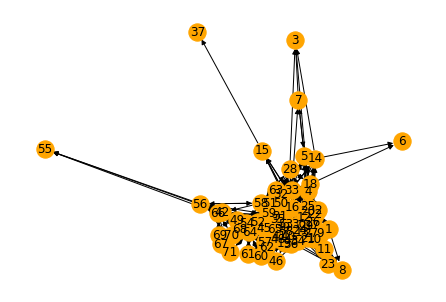

In [5]:
# Simple graph (not really readable)
nx.draw(ELfriend, with_labels = True, node_color="orange", edge_color="black")
plt.show()

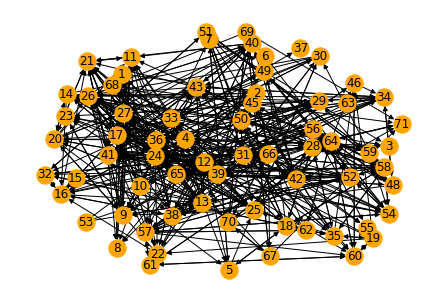

In [6]:
# Another graph with more spaces between nodes
pos = nx.spring_layout(ELfriend, k=0.8, iterations=20)
nx.draw(ELfriend, with_labels = True, node_color="orange", edge_color="black", pos=pos)
plt.show()

 Calculate in- and out-degrees

In [7]:
print("out-degrees")
print(ELfriend.out_degree())
print("\nin-degrees")
print(ELfriend.in_degree()) 

out-degrees
[(1, 4), (2, 4), (4, 15), (8, 1), (17, 23), (16, 8), (22, 8), (26, 9), (3, 0), (9, 6), (11, 5), (12, 22), (14, 8), (19, 4), (21, 8), (23, 1), (27, 13), (29, 10), (5, 3), (7, 2), (18, 9), (25, 11), (24, 23), (10, 14), (13, 14), (34, 6), (38, 8), (15, 4), (20, 12), (41, 12), (43, 15), (52, 11), (6, 0), (28, 12), (50, 8), (37, 0), (32, 4), (39, 8), (40, 10), (31, 25), (33, 12), (35, 9), (51, 6), (58, 13), (46, 3), (60, 4), (36, 9), (57, 9), (30, 6), (42, 15), (54, 7), (56, 8), (48, 7), (49, 4), (64, 19), (45, 6), (55, 0), (65, 22), (62, 4), (59, 5), (53, 3), (61, 3), (63, 2), (66, 16), (69, 5), (70, 7), (71, 1), (68, 6), (67, 4)]

in-degrees
[(1, 5), (2, 10), (4, 14), (8, 7), (17, 18), (16, 10), (22, 6), (26, 22), (3, 4), (9, 14), (11, 14), (12, 8), (14, 6), (19, 4), (21, 15), (23, 7), (27, 17), (29, 10), (5, 5), (7, 2), (18, 5), (25, 10), (24, 17), (10, 4), (13, 20), (34, 11), (38, 13), (15, 2), (20, 7), (41, 17), (43, 13), (52, 14), (6, 2), (28, 9), (50, 8), (37, 1), (32, 7)

View the neighbors of one node of your choice (I chose node 67) and plot graph.

In [8]:
node_chosen = 67
predecessors = list(ELfriend.predecessors(node_chosen))
print("predecessors :",predecessors)
successors = list(ELfriend.successors(node_chosen))
print("successors :",successors)
neighbors = list(dict.fromkeys(predecessors + successors)) #remove duplicate nodes
print(neighbors)

predecessors : [66, 69, 70]
successors : [68, 69, 70, 71]
[66, 69, 70, 68, 71]


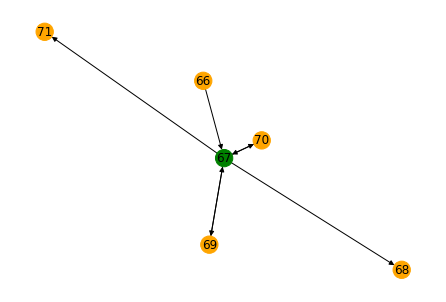

In [9]:
# Filter Nodes around individual 67
ELfriend_67 = ELfriend.subgraph([node_chosen] + neighbors)

# Filter Edges around individual 67
selected_edges = [(u,v) for u,v in ELfriend_67.edges() if (u == node_chosen or v == node_chosen) ]
ELfriend_67 = ELfriend_67.edge_subgraph(selected_edges)

#Plot node 67 in green to highlight it
node_color = []
for node in ELfriend_67:
    if node == node_chosen:
        node_color.append('green')
    else:
        node_color.append('orange') 

# Plot subgraph around individual 67
nx.draw(ELfriend_67, with_labels = True, node_color=node_color,
        edge_color="black")
plt.show()


## Question 3

Replace two edges of your choice and re-do the above

=> I delete (67,70) and (67,71) and replace them by (67,1) and (67,2)

In [10]:
# delete and replace
ELfriend.remove_edges_from([(67, 70),(67,71)])
ELfriend.add_edges_from([(67, 1),(67,2)])

Create graph and see its basic properties.

=> still 69 nodes and 575 edges

In [11]:
print(nx.info(ELfriend))

Name: 
Type: DiGraph
Number of nodes: 69
Number of edges: 575
Average in degree:   8.3333
Average out degree:   8.3333


View nodes and edges.

In [12]:
print("Nodes :", ELfriend.nodes(),"\n")
print("Edges :", ELfriend.edges())

Nodes : [1, 2, 4, 8, 17, 16, 22, 26, 3, 9, 11, 12, 14, 19, 21, 23, 27, 29, 5, 7, 18, 25, 24, 10, 13, 34, 38, 15, 20, 41, 43, 52, 6, 28, 50, 37, 32, 39, 40, 31, 33, 35, 51, 58, 46, 60, 36, 57, 30, 42, 54, 56, 48, 49, 64, 45, 55, 65, 62, 59, 53, 61, 63, 66, 69, 70, 71, 68, 67] 

Edges : [(1, 2), (1, 4), (1, 8), (1, 17), (2, 16), (2, 17), (2, 22), (2, 26), (4, 2), (4, 3), (4, 9), (4, 11), (4, 12), (4, 14), (4, 16), (4, 17), (4, 19), (4, 21), (4, 22), (4, 23), (4, 26), (4, 27), (4, 29), (8, 11), (17, 1), (17, 2), (17, 4), (17, 8), (17, 9), (17, 10), (17, 11), (17, 12), (17, 13), (17, 14), (17, 16), (17, 20), (17, 21), (17, 22), (17, 23), (17, 24), (17, 25), (17, 26), (17, 27), (17, 34), (17, 39), (17, 40), (17, 43), (16, 2), (16, 13), (16, 15), (16, 17), (16, 21), (16, 32), (16, 34), (16, 38), (22, 1), (22, 2), (22, 4), (22, 13), (22, 16), (22, 17), (22, 20), (22, 26), (26, 1), (26, 2), (26, 4), (26, 9), (26, 13), (26, 17), (26, 24), (26, 27), (26, 40), (9, 4), (9, 11), (9, 21), (9, 23), (

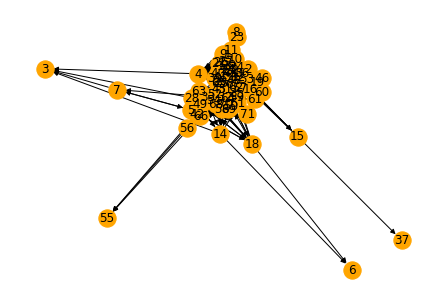

In [13]:
# Simple graph (not really readable)
nx.draw(ELfriend, with_labels = True, node_color="orange", edge_color="black")
plt.show()

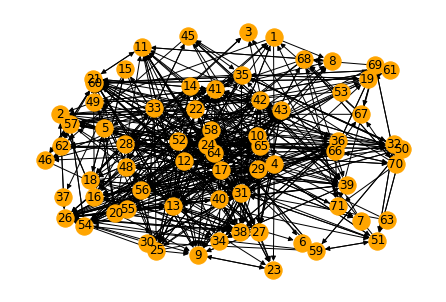

In [14]:
# Another graph with more spaces between nodes
pos = nx.spring_layout(ELfriend, k=0.8, iterations=20)
nx.draw(ELfriend, with_labels = True, node_color="orange", edge_color="black",
        pos=pos)
plt.show()

 Calculate in- and out-degrees

In [15]:
print("out-degrees")
print(ELfriend.out_degree())
print("\nin-degrees")
print(ELfriend.in_degree()) 

out-degrees
[(1, 4), (2, 4), (4, 15), (8, 1), (17, 23), (16, 8), (22, 8), (26, 9), (3, 0), (9, 6), (11, 5), (12, 22), (14, 8), (19, 4), (21, 8), (23, 1), (27, 13), (29, 10), (5, 3), (7, 2), (18, 9), (25, 11), (24, 23), (10, 14), (13, 14), (34, 6), (38, 8), (15, 4), (20, 12), (41, 12), (43, 15), (52, 11), (6, 0), (28, 12), (50, 8), (37, 0), (32, 4), (39, 8), (40, 10), (31, 25), (33, 12), (35, 9), (51, 6), (58, 13), (46, 3), (60, 4), (36, 9), (57, 9), (30, 6), (42, 15), (54, 7), (56, 8), (48, 7), (49, 4), (64, 19), (45, 6), (55, 0), (65, 22), (62, 4), (59, 5), (53, 3), (61, 3), (63, 2), (66, 16), (69, 5), (70, 7), (71, 1), (68, 6), (67, 4)]

in-degrees
[(1, 6), (2, 11), (4, 14), (8, 7), (17, 18), (16, 10), (22, 6), (26, 22), (3, 4), (9, 14), (11, 14), (12, 8), (14, 6), (19, 4), (21, 15), (23, 7), (27, 17), (29, 10), (5, 5), (7, 2), (18, 5), (25, 10), (24, 17), (10, 4), (13, 20), (34, 11), (38, 13), (15, 2), (20, 7), (41, 17), (43, 13), (52, 14), (6, 2), (28, 9), (50, 8), (37, 1), (32, 7)

View the neighbors of one node of your choice (I chose node 67) and plot graph.

In [16]:
node_chosen = 67
predecessors = list(ELfriend.predecessors(node_chosen))
print("predecessors :",predecessors)
successors = list(ELfriend.successors(node_chosen))
print("successors :",successors)
neighbors = list(dict.fromkeys(predecessors + successors)) #remove duplicate nodes
print(neighbors)

predecessors : [66, 69, 70]
successors : [68, 69, 1, 2]
[66, 69, 70, 68, 1, 2]


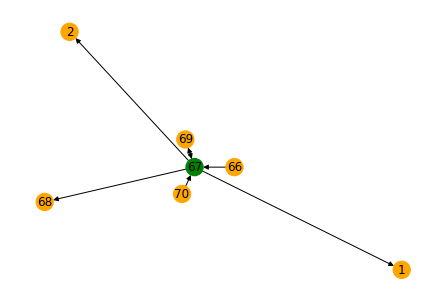

In [17]:
# Filter Nodes around individual 67
ELfriend_67 = ELfriend.subgraph([node_chosen] + neighbors)

# Filter Edges around individual 67
selected_edges = [(u,v) for u,v in ELfriend_67.edges() if (u == node_chosen or v == node_chosen) ]
ELfriend_67 = ELfriend_67.edge_subgraph(selected_edges)

#Plot node 67 in green to highlight it
node_color = []
for node in ELfriend_67:
    if node == node_chosen:
        node_color.append('green')
    else:
        node_color.append('orange') 

# Plot subgraph around individual 67
nx.draw(ELfriend_67, with_labels = True, node_color=node_color,
        edge_color="black")
plt.show()

## Question 4

Remove three nodes of your choice and re-do the above

=> I delete nodes 68, 69 and 70

In [18]:
ELfriend.remove_nodes_from([68, 69, 70])

Create graph and see its basic properties.

=> now 66 nodes and 549 edges

In [19]:
print(nx.info(ELfriend))

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 549
Average in degree:   8.3182
Average out degree:   8.3182


View nodes and edges.

In [20]:
print("Nodes :", ELfriend.nodes(),"\n")
print("Edges :", ELfriend.edges())

Nodes : [1, 2, 4, 8, 17, 16, 22, 26, 3, 9, 11, 12, 14, 19, 21, 23, 27, 29, 5, 7, 18, 25, 24, 10, 13, 34, 38, 15, 20, 41, 43, 52, 6, 28, 50, 37, 32, 39, 40, 31, 33, 35, 51, 58, 46, 60, 36, 57, 30, 42, 54, 56, 48, 49, 64, 45, 55, 65, 62, 59, 53, 61, 63, 66, 71, 67] 

Edges : [(1, 2), (1, 4), (1, 8), (1, 17), (2, 16), (2, 17), (2, 22), (2, 26), (4, 2), (4, 3), (4, 9), (4, 11), (4, 12), (4, 14), (4, 16), (4, 17), (4, 19), (4, 21), (4, 22), (4, 23), (4, 26), (4, 27), (4, 29), (8, 11), (17, 1), (17, 2), (17, 4), (17, 8), (17, 9), (17, 10), (17, 11), (17, 12), (17, 13), (17, 14), (17, 16), (17, 20), (17, 21), (17, 22), (17, 23), (17, 24), (17, 25), (17, 26), (17, 27), (17, 34), (17, 39), (17, 40), (17, 43), (16, 2), (16, 13), (16, 15), (16, 17), (16, 21), (16, 32), (16, 34), (16, 38), (22, 1), (22, 2), (22, 4), (22, 13), (22, 16), (22, 17), (22, 20), (22, 26), (26, 1), (26, 2), (26, 4), (26, 9), (26, 13), (26, 17), (26, 24), (26, 27), (26, 40), (9, 4), (9, 11), (9, 21), (9, 23), (9, 24), (9, 

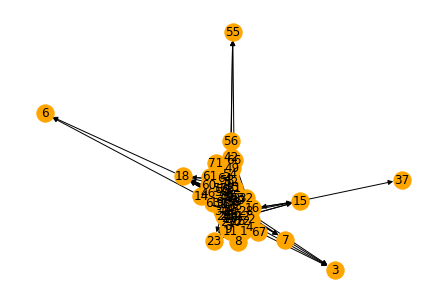

In [21]:
# Simple graph (not really readable)
nx.draw(ELfriend, with_labels = True, node_color="orange", edge_color="black")
plt.show()

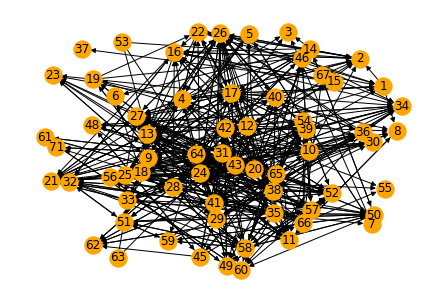

In [22]:
# Another graph with more spaces between nodes
pos = nx.spring_layout(ELfriend, k=0.8, iterations=20)
nx.draw(ELfriend, with_labels = True, node_color="orange", edge_color="black",
        pos=pos)
plt.show()

 Calculate in- and out-degrees

In [23]:
print("out-degrees")
print(ELfriend.out_degree())
print("\nin-degrees")
print(ELfriend.in_degree()) 

out-degrees
[(1, 4), (2, 4), (4, 15), (8, 1), (17, 23), (16, 8), (22, 8), (26, 9), (3, 0), (9, 6), (11, 5), (12, 22), (14, 8), (19, 4), (21, 8), (23, 1), (27, 13), (29, 10), (5, 3), (7, 2), (18, 9), (25, 11), (24, 23), (10, 14), (13, 14), (34, 6), (38, 8), (15, 4), (20, 12), (41, 12), (43, 15), (52, 11), (6, 0), (28, 12), (50, 8), (37, 0), (32, 4), (39, 8), (40, 10), (31, 25), (33, 12), (35, 9), (51, 6), (58, 13), (46, 3), (60, 4), (36, 9), (57, 9), (30, 6), (42, 15), (54, 7), (56, 8), (48, 7), (49, 4), (64, 17), (45, 6), (55, 0), (65, 21), (62, 4), (59, 5), (53, 3), (61, 3), (63, 2), (66, 13), (71, 1), (67, 2)]

in-degrees
[(1, 6), (2, 11), (4, 14), (8, 7), (17, 18), (16, 10), (22, 6), (26, 22), (3, 4), (9, 14), (11, 14), (12, 8), (14, 6), (19, 4), (21, 15), (23, 7), (27, 17), (29, 10), (5, 5), (7, 2), (18, 5), (25, 10), (24, 17), (10, 4), (13, 20), (34, 11), (38, 13), (15, 2), (20, 7), (41, 16), (43, 13), (52, 14), (6, 2), (28, 9), (50, 8), (37, 1), (32, 7), (39, 13), (40, 8), (31, 1

View the neighbors of one node of your choice (I chose node 67) and plot graph.

In [24]:
node_chosen = 67
predecessors = list(ELfriend.predecessors(node_chosen))
print("predecessors :",predecessors)
successors = list(ELfriend.successors(node_chosen))
print("successors :",successors)
neighbors = list(dict.fromkeys(predecessors + successors)) #remove duplicate nodes
print(neighbors)

predecessors : [66]
successors : [1, 2]
[66, 1, 2]


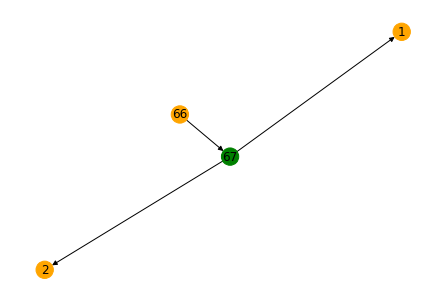

In [25]:
# Filter Nodes around individual 67
ELfriend_67 = ELfriend.subgraph([node_chosen] + neighbors)

# Filter Edges around individual 67
selected_edges = [(u,v) for u,v in ELfriend_67.edges() if (u == node_chosen or v == node_chosen) ]
ELfriend_67 = ELfriend_67.edge_subgraph(selected_edges)

#Plot node 67 in green to highlight it
node_color = []
for node in ELfriend_67:
    if node == node_chosen:
        node_color.append('green')
    else:
        node_color.append('orange') 

# Plot subgraph around individual 67
nx.draw(ELfriend_67, with_labels = True, node_color=node_color,
        edge_color="black")
plt.show()

In [26]:
# delete and replace
ELfriend.remove_edges_from([(67, 70),(67,71)])
ELfriend.add_edges_from([(67, 1),(67,2)])

## Question 5

Repeat the same exercice with ELcowork. But, careful: ELfriend is an asymmetric matrix (like ELadvice), while ELcowork is symmetric


Load ELcowork

In [27]:
ELcowork = nx.read_edgelist('ELcowork_edgelist.txt',
                            comments="node",
                            create_using=nx.Graph(), #NEW ! Symmetric graph
                            nodetype=int)

Create graph and see its basic properties.

=> 70 nodes, 378 edges and average degree of 10.8

In [28]:
print(nx.info(ELcowork))

Name: 
Type: Graph
Number of nodes: 70
Number of edges: 378
Average degree:  10.8000


View nodes and edges.

In [29]:
print("Nodes :", ELcowork.nodes(),"\n")
print("Edges :", ELcowork.edges())

Nodes : [1, 17, 39, 40, 41, 2, 7, 16, 22, 26, 29, 44, 53, 62, 64, 3, 18, 25, 28, 4, 12, 19, 20, 31, 37, 45, 46, 52, 61, 70, 5, 24, 32, 33, 38, 50, 51, 54, 58, 59, 63, 6, 30, 43, 65, 9, 60, 10, 34, 49, 11, 56, 15, 42, 13, 55, 57, 66, 67, 71, 14, 35, 36, 47, 48, 27, 68, 21, 69, 23] 

Edges : [(1, 17), (1, 39), (1, 40), (1, 41), (17, 2), (17, 4), (17, 11), (17, 12), (17, 14), (17, 16), (17, 19), (17, 22), (17, 24), (17, 25), (17, 26), (17, 28), (17, 29), (17, 34), (17, 39), (17, 42), (17, 44), (17, 45), (17, 48), (17, 61), (17, 62), (39, 5), (39, 11), (39, 13), (39, 22), (39, 26), (39, 30), (39, 42), (39, 66), (39, 69), (40, 4), (40, 11), (40, 13), (40, 20), (40, 21), (40, 22), (40, 23), (40, 24), (40, 26), (40, 27), (40, 65), (40, 70), (41, 11), (41, 13), (41, 21), (41, 23), (41, 24), (41, 26), (41, 43), (41, 49), (41, 54), (41, 55), (41, 56), (41, 57), (41, 65), (41, 66), (41, 68), (2, 7), (2, 16), (2, 22), (2, 26), (2, 29), (2, 44), (2, 53), (2, 62), (2, 64), (7, 18), (7, 63), (16, 9),

=> Graph with no arrow

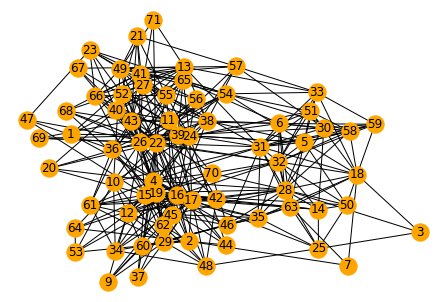

In [30]:
# Graph
nx.draw(ELcowork, with_labels = True, node_color="orange", edge_color="black")
plt.show()

 Calculate in- and out-degrees
 
 => Impossible because it is a symmetric graph. We just calculate the degrees.

In [31]:
print("degrees")
print(ELcowork.degree())

degrees
[(1, 4), (17, 22), (39, 11), (40, 13), (41, 16), (2, 10), (7, 3), (16, 25), (22, 28), (26, 27), (29, 17), (44, 5), (53, 5), (62, 10), (64, 5), (3, 3), (18, 13), (25, 8), (28, 20), (4, 17), (12, 13), (19, 20), (20, 5), (31, 19), (37, 4), (45, 10), (46, 9), (52, 7), (61, 9), (70, 8), (5, 14), (24, 18), (32, 18), (33, 9), (38, 13), (50, 7), (51, 10), (54, 11), (58, 10), (59, 8), (63, 12), (6, 12), (30, 9), (43, 14), (65, 11), (9, 5), (60, 7), (10, 8), (34, 8), (49, 12), (11, 11), (56, 7), (15, 19), (42, 8), (13, 15), (55, 13), (57, 8), (66, 9), (67, 4), (71, 4), (14, 8), (35, 11), (36, 9), (47, 4), (48, 8), (27, 11), (68, 6), (21, 7), (69, 4), (23, 8)]


View the neighbors of one node of your choice (I chose node 67) and plot graph.

=> No predecessors and successors, we just calculate neighbors

In [32]:
node_chosen = 67
neighbors = list(ELcowork.neighbors(node_chosen))
print(neighbors)

[13, 24, 26, 43]


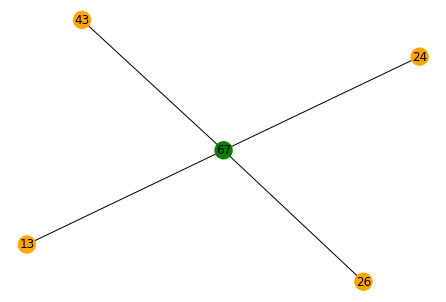

In [33]:
# Filter Nodes around individual 67
ELcowork_67 = ELcowork.subgraph([node_chosen] + neighbors)

# Filter Edges around individual 67
selected_edges = [(u,v) for u,v in ELcowork_67.edges() if (u == node_chosen or v == node_chosen) ]
ELcowork_67 = ELcowork_67.edge_subgraph(selected_edges)

#Plot node 67 in green to highlight it
node_color = []
for node in ELcowork_67:
    if node == node_chosen:
        node_color.append('green')
    else:
        node_color.append('orange') 

# Plot subgraph around individual 67
nx.draw(ELcowork_67, with_labels = True, node_color=node_color,
        edge_color="black")
plt.show()

Replace two edges of your choice and re-do the above

=> I delete (67,43) and (67,13) and replace them by (67,1) and (67,2)

In [34]:
# delete and replace
ELcowork.remove_edges_from([(67, 43),(67,13)])
ELcowork.add_edges_from([(67, 1),(67,2)])

Create graph and see its basic properties.

=> still 70 nodes and 378 edges

In [35]:
print(nx.info(ELcowork))

Name: 
Type: Graph
Number of nodes: 70
Number of edges: 378
Average degree:  10.8000


View nodes and edges.

In [36]:
print("Nodes :", ELcowork.nodes(),"\n")
print("Edges :", ELcowork.edges())

Nodes : [1, 17, 39, 40, 41, 2, 7, 16, 22, 26, 29, 44, 53, 62, 64, 3, 18, 25, 28, 4, 12, 19, 20, 31, 37, 45, 46, 52, 61, 70, 5, 24, 32, 33, 38, 50, 51, 54, 58, 59, 63, 6, 30, 43, 65, 9, 60, 10, 34, 49, 11, 56, 15, 42, 13, 55, 57, 66, 67, 71, 14, 35, 36, 47, 48, 27, 68, 21, 69, 23] 

Edges : [(1, 17), (1, 39), (1, 40), (1, 41), (1, 67), (17, 2), (17, 4), (17, 11), (17, 12), (17, 14), (17, 16), (17, 19), (17, 22), (17, 24), (17, 25), (17, 26), (17, 28), (17, 29), (17, 34), (17, 39), (17, 42), (17, 44), (17, 45), (17, 48), (17, 61), (17, 62), (39, 5), (39, 11), (39, 13), (39, 22), (39, 26), (39, 30), (39, 42), (39, 66), (39, 69), (40, 4), (40, 11), (40, 13), (40, 20), (40, 21), (40, 22), (40, 23), (40, 24), (40, 26), (40, 27), (40, 65), (40, 70), (41, 11), (41, 13), (41, 21), (41, 23), (41, 24), (41, 26), (41, 43), (41, 49), (41, 54), (41, 55), (41, 56), (41, 57), (41, 65), (41, 66), (41, 68), (2, 7), (2, 16), (2, 22), (2, 26), (2, 29), (2, 44), (2, 53), (2, 62), (2, 64), (2, 67), (7, 18),

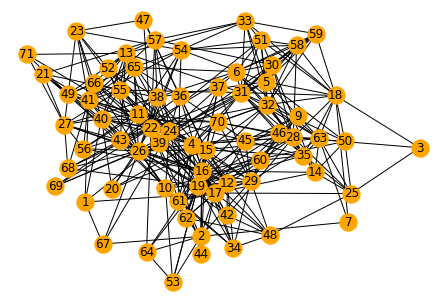

In [37]:
# Graph
nx.draw(ELcowork, with_labels = True, node_color="orange", edge_color="black")
plt.show()

 Calculate in- and out-degrees
 
=> Degrees again

In [38]:
print("degrees")
print(ELcowork.degree())

degrees
[(1, 5), (17, 22), (39, 11), (40, 13), (41, 16), (2, 11), (7, 3), (16, 25), (22, 28), (26, 27), (29, 17), (44, 5), (53, 5), (62, 10), (64, 5), (3, 3), (18, 13), (25, 8), (28, 20), (4, 17), (12, 13), (19, 20), (20, 5), (31, 19), (37, 4), (45, 10), (46, 9), (52, 7), (61, 9), (70, 8), (5, 14), (24, 18), (32, 18), (33, 9), (38, 13), (50, 7), (51, 10), (54, 11), (58, 10), (59, 8), (63, 12), (6, 12), (30, 9), (43, 13), (65, 11), (9, 5), (60, 7), (10, 8), (34, 8), (49, 12), (11, 11), (56, 7), (15, 19), (42, 8), (13, 14), (55, 13), (57, 8), (66, 9), (67, 4), (71, 4), (14, 8), (35, 11), (36, 9), (47, 4), (48, 8), (27, 11), (68, 6), (21, 7), (69, 4), (23, 8)]


View the neighbors of one node of your choice (I chose node 67) and plot graph.

In [39]:
node_chosen = 67
neighbors = list(ELcowork.neighbors(node_chosen))
print("neighbors :", neighbors)

neighbors : [24, 26, 1, 2]


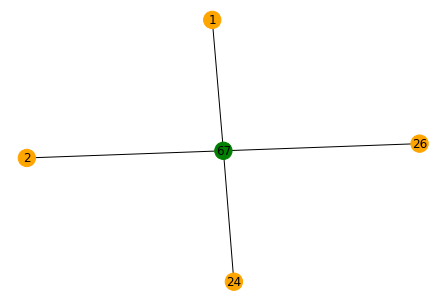

In [40]:
# Filter Nodes around individual 67
ELcowork_67 = ELcowork.subgraph([node_chosen] + neighbors)

# Filter Edges around individual 67
selected_edges = [(u,v) for u,v in ELcowork_67.edges() if (u == node_chosen or v == node_chosen) ]
ELcowork_67 = ELcowork_67.edge_subgraph(selected_edges)

#Plot node 67 in green to highlight it
node_color = []
for node in ELcowork_67:
    if node == node_chosen:
        node_color.append('green')
    else:
        node_color.append('orange') 

# Plot subgraph around individual 67
nx.draw(ELcowork_67, with_labels = True, node_color=node_color,
        edge_color="black")
plt.show()

Remove three nodes of your choice and re-do the above

=> I delete nodes 1, 2 and 24

In [41]:
ELcowork.remove_nodes_from([1, 2, 24])

Create graph and see its basic properties.

=> now 67 nodes and 361 edges

In [42]:
print(nx.info(ELcowork))

Name: 
Type: Graph
Number of nodes: 67
Number of edges: 344
Average degree:  10.2687


View nodes and edges.

In [43]:
print("Nodes :", ELcowork.nodes(),"\n")
print("Edges :", ELcowork.edges())

Nodes : [17, 39, 40, 41, 7, 16, 22, 26, 29, 44, 53, 62, 64, 3, 18, 25, 28, 4, 12, 19, 20, 31, 37, 45, 46, 52, 61, 70, 5, 32, 33, 38, 50, 51, 54, 58, 59, 63, 6, 30, 43, 65, 9, 60, 10, 34, 49, 11, 56, 15, 42, 13, 55, 57, 66, 67, 71, 14, 35, 36, 47, 48, 27, 68, 21, 69, 23] 

Edges : [(17, 4), (17, 11), (17, 12), (17, 14), (17, 16), (17, 19), (17, 22), (17, 25), (17, 26), (17, 28), (17, 29), (17, 34), (17, 39), (17, 42), (17, 44), (17, 45), (17, 48), (17, 61), (17, 62), (39, 5), (39, 11), (39, 13), (39, 22), (39, 26), (39, 30), (39, 42), (39, 66), (39, 69), (40, 4), (40, 11), (40, 13), (40, 20), (40, 21), (40, 22), (40, 23), (40, 26), (40, 27), (40, 65), (40, 70), (41, 11), (41, 13), (41, 21), (41, 23), (41, 26), (41, 43), (41, 49), (41, 54), (41, 55), (41, 56), (41, 57), (41, 65), (41, 66), (41, 68), (7, 18), (7, 63), (16, 9), (16, 12), (16, 14), (16, 15), (16, 22), (16, 26), (16, 27), (16, 29), (16, 32), (16, 34), (16, 36), (16, 37), (16, 38), (16, 42), (16, 44), (16, 48), (16, 50), (16,

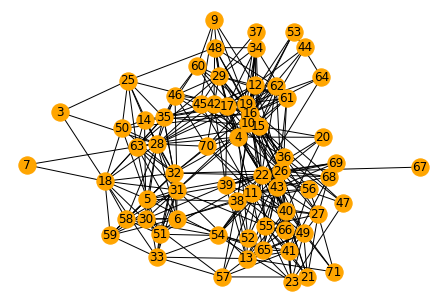

In [44]:
# Graph
nx.draw(ELcowork, with_labels = True, node_color="orange", edge_color="black")
plt.show()

 Calculate in- and out-degrees
 
 => Degrees again

In [45]:
print("degrees")
print(ELcowork.degree())

degrees
[(17, 19), (39, 10), (40, 11), (41, 14), (7, 2), (16, 24), (22, 27), (26, 25), (29, 16), (44, 3), (53, 4), (62, 9), (64, 4), (3, 3), (18, 13), (25, 8), (28, 20), (4, 17), (12, 13), (19, 19), (20, 5), (31, 18), (37, 4), (45, 10), (46, 9), (52, 6), (61, 9), (70, 8), (5, 13), (32, 18), (33, 9), (38, 12), (50, 7), (51, 10), (54, 11), (58, 10), (59, 8), (63, 12), (6, 11), (30, 9), (43, 13), (65, 10), (9, 5), (60, 7), (10, 7), (34, 8), (49, 12), (11, 11), (56, 7), (15, 18), (42, 8), (13, 14), (55, 12), (57, 7), (66, 9), (67, 1), (71, 4), (14, 8), (35, 11), (36, 8), (47, 4), (48, 8), (27, 11), (68, 6), (21, 7), (69, 4), (23, 8)]


View the neighbors of one node of your choice (I chose node 67) and plot graph.

In [46]:
node_chosen = 67
neighbors = list(ELcowork.neighbors(node_chosen))
print("neighbors :",neighbors)

neighbors : [26]


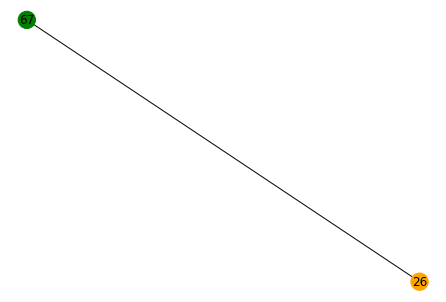

In [47]:
# Filter Nodes around individual 67
ELcowork_67 = ELcowork.subgraph([node_chosen] + neighbors)

# Filter Edges around individual 67
selected_edges = [(u,v) for u,v in ELcowork_67.edges() if (u == node_chosen or v == node_chosen) ]
ELcowork_67 = ELcowork_67.edge_subgraph(selected_edges)

#Plot node 67 in green to highlight it
node_color = []
for node in ELcowork_67:
    if node == node_chosen:
        node_color.append('green')
    else:
        node_color.append('orange') 

# Plot subgraph around individual 67
nx.draw(ELcowork_67, with_labels = True, node_color=node_color,
        edge_color="black")
plt.show()